In [1]:
import numpy as np
import time

In [ ]:
import time
import numpy as np

def elemento_por_dos():
    tallas = []
    tiempos_a = []
    for i in range(1000, 10000, 1000):
        tallas.append(i)
        m1 = np.random.rand(i, i)
        tamaño_matriz = m1.shape
        inicio = time.time()
        for _ in range(tamaño_matriz[0]):
            for j in range(tamaño_matriz[1]):
                m1[_, j] *= 2
        fin = time.time()
        tiempo_el = fin - inicio
        tiempos_a.append(tiempo_el)
    return tiempos_a, tallas

def todo_dos():
    tallas = []
    tiempos_b = []
    for i in range(1000, 10000, 1000):
        tallas.append(i)
        m2 = np.random.rand(i, i)
        inicio = time.time()
        m2 = m2 * 2
        fin = time.time()
        tiempo_numpy = fin - inicio
        tiempos_b.append(tiempo_numpy)
    return tiempos_b, tallas


In [ ]:
tiempos_el, tallas_el=elemento_por_dos()
tiempos_numpy, tallas_numpy=todo_dos()

In [ ]:
print(tiempos_el)
print(tiempos_numpy)

[0.2684295177459717, 1.0730736255645752, 2.4342222213745117, 4.342154264450073, 6.7965850830078125, 9.847272634506226, 13.261151552200317, 17.791163682937622, 24.11489772796631]
[0.0016331672668457031, 0.006402730941772461, 0.013146638870239258, 0.024544715881347656, 0.04412651062011719, 0.07336902618408203, 0.08230400085449219, 0.09794235229492188, 0.11999750137329102]


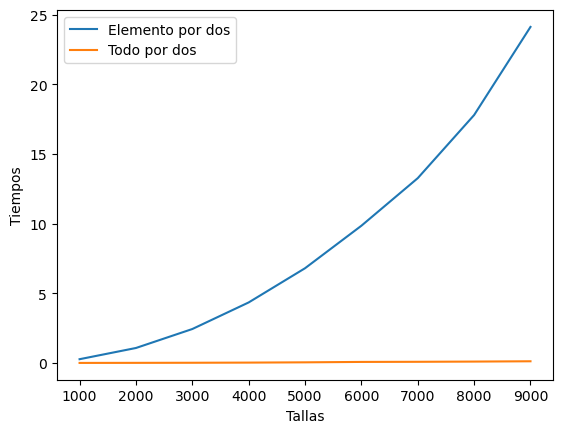

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Trazar las líneas de tiempo
ax.plot(tallas_el, tiempos_el, label='Elemento por dos')
ax.plot(tallas_numpy, tiempos_numpy, label='Todo por dos')

# Añadir etiquetas y leyenda
ax.set_xlabel('Tallas')
ax.set_ylabel('Tiempos')
ax.legend()

# Mostrar la gráfica
plt.show()

In [6]:
import time
import numpy as np
import torch

#Vemos el si está la GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

#Las matrices aleatorias que vamos a multiplicar
M1 = np.random.rand(1000, 1000)
M2 = np.random.rand(1000, 1000)

#Pasamos las matrices a gpu
TM1 = torch.from_numpy(M1)
TM2 = torch.from_numpy(M2)




Device: cuda


In [8]:
def numpy():
  t_numpy = 0
  tallas=[]
  tiempos=[]
  for i in range(1000, 10000, 1000):
    M1 = np.random.rand(i, i)
    M2 = np.random.rand(i, i)
    for _ in range(100):
          inicio = time.time()
          resultado_numpy = M1 * M2
          fin = time.time()
          t_numpy += fin - inicio
          tiempos.append(t_numpy)
          tallas.append(i)
  return tiempos, tallas

def gpu():
  t_gpu = 0
  tallas=[]
  tiempos=[]
  for i in range(1000, 10000, 1000):
    M1 = np.random.rand(i, i)
    M2 = np.random.rand(i, i)
    TM1 = torch.from_numpy(M1)
    TM2 = torch.from_numpy(M2)
    for _ in range(100):
        inicio = time.time()
        resultado_gpu = TM1*TM2
        torch.cuda.synchronize()
        fin = time.time()
        t_gpu += fin - inicio
        tiempos.append(t_gpu)
        tallas.append(i)
  return tiempos, tallas


tiempo_n, tallas_n=numpy()
tiempo_g, tallas_g=gpu()


In [10]:
print(tiempo_n)
print(tiempo_g)

[0.002183198928833008, 0.004300594329833984, 0.005823850631713867, 0.00733494758605957, 0.008649826049804688, 0.009954452514648438, 0.011380195617675781, 0.012683391571044922, 0.01383662223815918, 0.015120744705200195, 0.016268253326416016, 0.01745915412902832, 0.01858353614807129, 0.019798994064331055, 0.020968198776245117, 0.022264480590820312, 0.023438692092895508, 0.024677515029907227, 0.025903940200805664, 0.027220964431762695, 0.02838921546936035, 0.029614686965942383, 0.030763864517211914, 0.03203892707824707, 0.0332026481628418, 0.03452467918395996, 0.03570294380187988, 0.036946773529052734, 0.0381014347076416, 0.03933262825012207, 0.04051399230957031, 0.04172778129577637, 0.04288434982299805, 0.04408121109008789, 0.04520869255065918, 0.046373605728149414, 0.04753732681274414, 0.0487523078918457, 0.04998612403869629, 0.05131649971008301, 0.05251669883728027, 0.053751468658447266, 0.054960012435913086, 0.05621671676635742, 0.057404518127441406, 0.05864286422729492, 0.05983233451

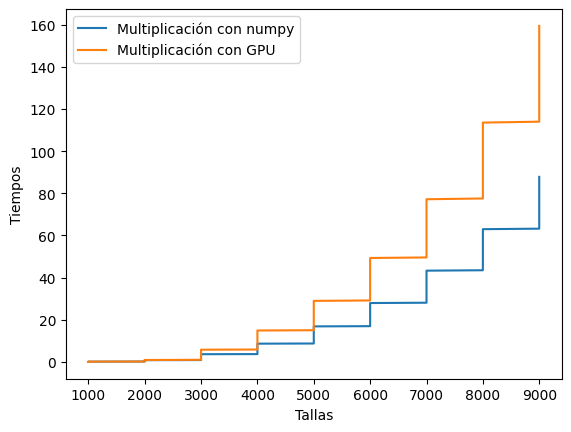

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Trazar las líneas de tiempo
ax.plot(tallas_n, tiempo_n, label='Multiplicación con numpy')
ax.plot(tallas_g, tiempo_g, label='Multiplicación con GPU')

# Añadir etiquetas y leyenda
ax.set_xlabel('Tallas')
ax.set_ylabel('Tiempos')
ax.legend()

# Mostrar la gráfica
plt.show()